In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


os.listdir("input")

['test.csv', 'train.csv', 'gender_submission.csv']

In [160]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

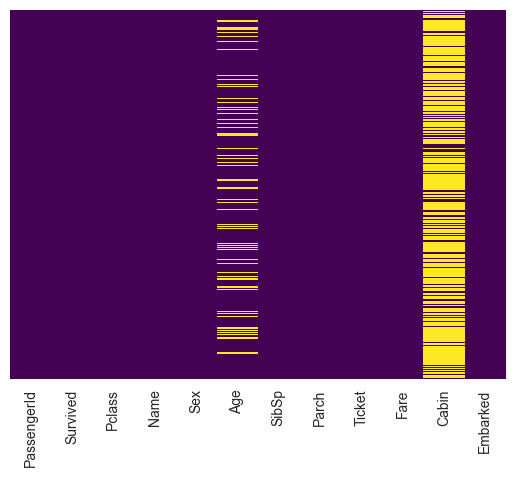

In [163]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #To get the columns which has null values

<AxesSubplot: xlabel='Sex', ylabel='count'>

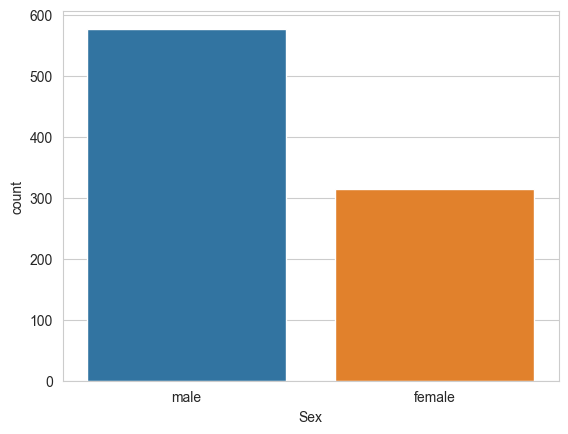

In [164]:
sns.countplot(x='Sex',data=train)


<AxesSubplot: xlabel='Sex', ylabel='count'>

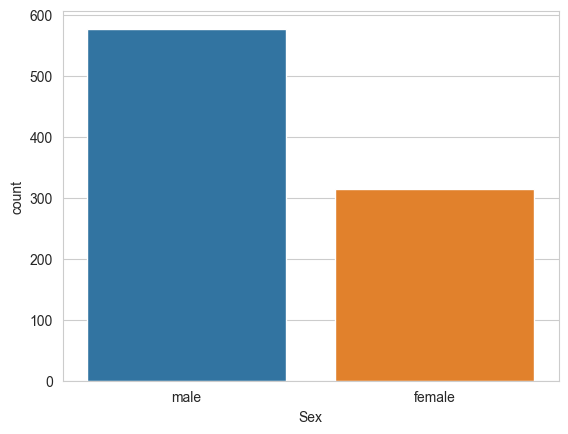

In [165]:
sns.countplot(x='Sex',data=train)


In [166]:
train.keys()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: xlabel='Parch', ylabel='count'>

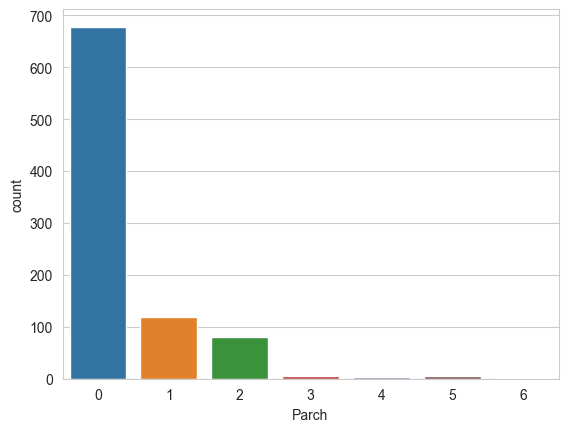

In [167]:
sns.countplot(x='Parch', data=train)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

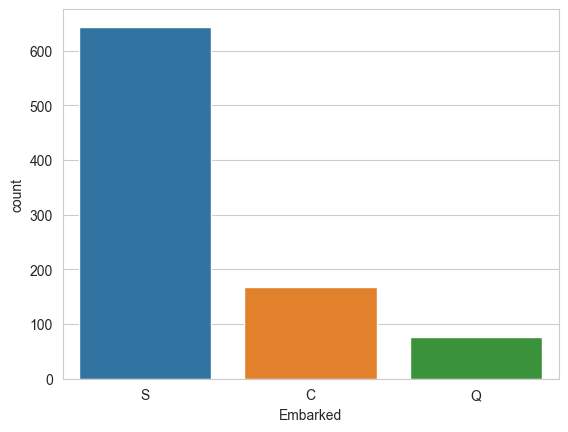

In [168]:
sns.countplot(x='Embarked', data=train)

<AxesSubplot: xlabel='Age', ylabel='count'>

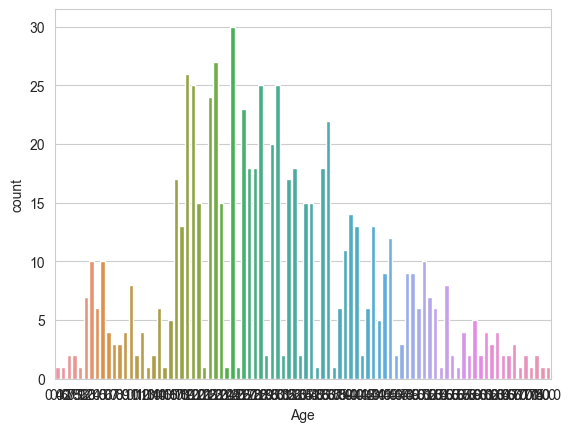

In [169]:
sns.countplot(x='Age', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

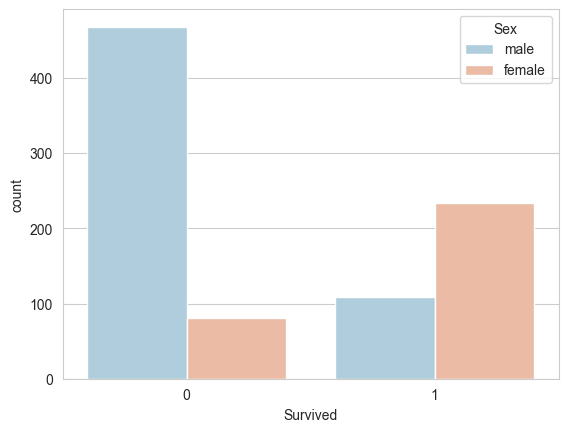

In [170]:
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r') #survival based on sex

<AxesSubplot: xlabel='Survived', ylabel='count'>

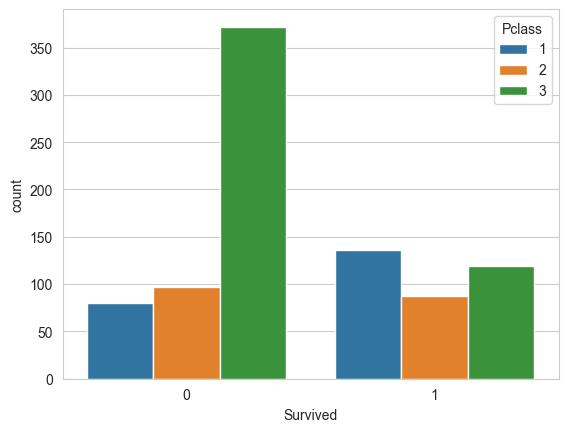

In [171]:
sns.countplot(x='Survived',hue='Pclass',data=train) #survival based on passenger class

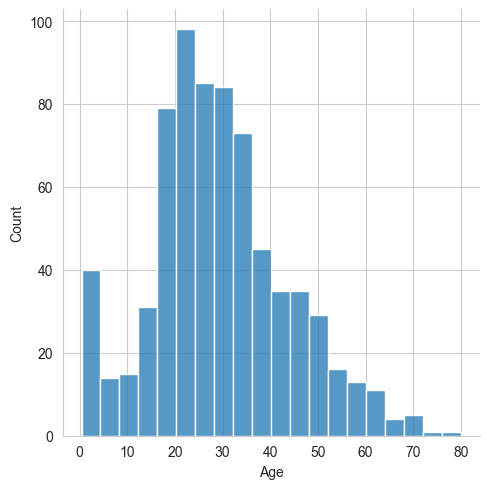

In [172]:
sns.displot(train['Age'].dropna(),kde=False,bins='auto')

<AxesSubplot: xlabel='SibSp', ylabel='count'>

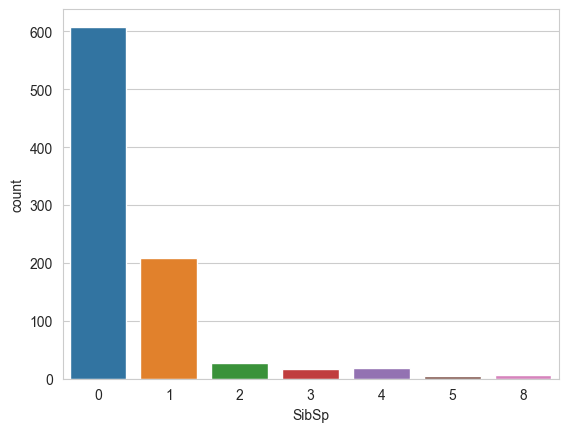

In [173]:
sns.countplot(x='SibSp',data=train) # count based on sibling or spouse

<AxesSubplot: >

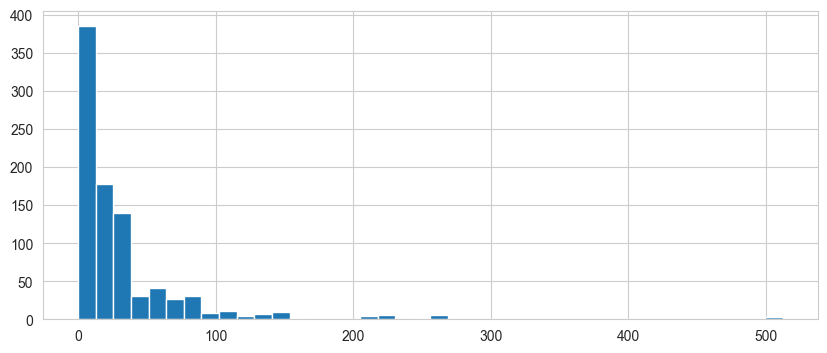

In [174]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [175]:
train['Fare']



0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [176]:


import cufflinks as cf
cf.go_offline()



In [177]:
train['Fare'].iplot(kind='hist',bins=40)

<AxesSubplot: xlabel='Parch', ylabel='count'>

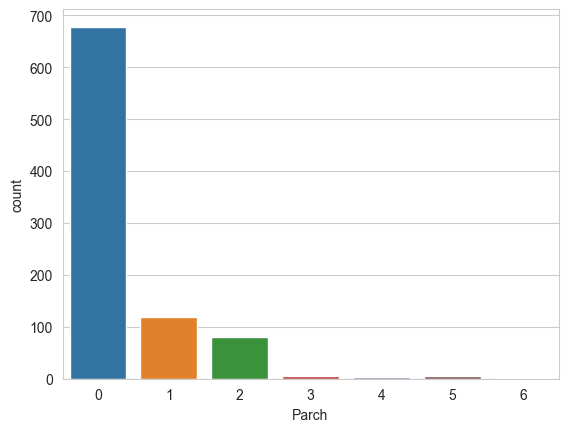

In [178]:
sns.countplot(x='Parch',data=train)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

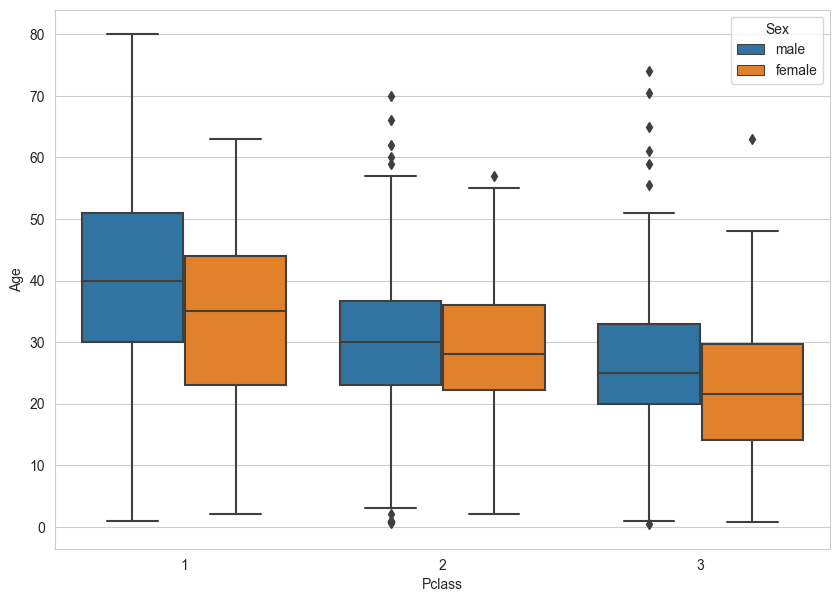

In [179]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age', hue='Sex',data=train)

In [180]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [181]:
train_data = train.copy()
test_data = test.copy()

In [182]:
del train_data['PassengerId']
del train_data['Name']
del train_data['Parch']
del train_data['Ticket']
del train_data['Fare']
del train_data['Cabin']
del train_data['Embarked']

del test_data['PassengerId']
del test_data['Name']
del test_data['Parch']
del test_data['Ticket']
del test_data['Fare']
del test_data['Cabin']
del test_data['Embarked']

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data, test_data)


ValueError: could not convert string to float: 'male'